# 关联分析

* [<span style='color:#f0bc22'> 1. |</span> Loading and Cleaning data](#section-one)
* [<span style='color:#f0bc22'> 2. |</span> Exploratoty Data Analysis](#section-two)
* [<span style='color:#f0bc22'> 3. |</span> Market Basket Analysis](#section-three)
* [<span style='color:#f0bc22'> 4. |</span> Conclusion](#section-four)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# <a id="section-one"></a>
## <b><span style='color:#f0bc22'> 1. |</span> Loading and Cleaning data

### <b><span style='color:#f0bc22'> 1-1. |</span> Loading data

In [2]:
df=pd.read_csv('Assignment-1_Data.csv',delimiter=';')
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [4]:
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

### <b><span style='color:#f0bc22'> 1-2. |</span> Dropping data with **`negative`** or **`zero quantity`**

In [5]:
df.loc[df['Quantity']<=0][:5]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
2359,536589,NaN,-10,01.12.2010 16:50,0,NaN,United Kingdom
4289,536764,NaN,-38,02.12.2010 14:42,0,NaN,United Kingdom
6998,536996,NaN,-20,03.12.2010 15:30,0,NaN,United Kingdom
6999,536997,NaN,-20,03.12.2010 15:30,0,NaN,United Kingdom
7000,536998,NaN,-6,03.12.2010 15:30,0,NaN,United Kingdom


In [6]:
df=df.loc[df['Quantity']>0]

### <b><span style='color:#f0bc22'> 1-3. |</span> Dropping data with **`zero price`**

In [7]:
df.loc[df['Price']<='0'][:5
                        ]

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
613,536414,NaN,56,01.12.2010 11:52,0,NaN,United Kingdom
1937,536545,NaN,1,01.12.2010 14:32,0,NaN,United Kingdom
1938,536546,NaN,1,01.12.2010 14:33,0,NaN,United Kingdom
1939,536547,NaN,1,01.12.2010 14:33,0,NaN,United Kingdom
1940,536549,NaN,1,01.12.2010 14:34,0,NaN,United Kingdom


In [8]:
df=df.loc[df['Price']>'0']

### <b><span style='color:#f0bc22'> 1-4. |</span> Dropping **`Non-product`** data.

In [9]:
df.loc[(df['Itemname']=='POSTAGE')|(df['Itemname']=='DOTCOM POSTAGE')|(df['Itemname']=='Adjust bad debt')|(df['Itemname']=='Manual')].head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
45,536370,POSTAGE,3,01.12.2010 08:45,18,12583.0,France
377,536403,POSTAGE,1,01.12.2010 11:27,15,12791.0,Netherlands
1113,536527,POSTAGE,1,01.12.2010 13:04,18,12662.0,Germany
1781,536544,DOTCOM POSTAGE,1,01.12.2010 14:32,"569,77",NaN,United Kingdom
2192,536569,Manual,1,01.12.2010 15:35,"1,25",16274.0,United Kingdom


In [10]:
df=df.loc[(df['Itemname']!='POSTAGE')&(df['Itemname']!='DOTCOM POSTAGE')&(df['Itemname']!='Adjust bad debt')&(df['Itemname']!='Manual')]

### <b><span style='color:#f0bc22'> 1-5. |</span> Filling **`null`** data

In [11]:
df.isnull().sum()

BillNo             0
Itemname           0
Quantity           0
Date               0
Price              0
CustomerID    130813
Country            0
dtype: int64

In [12]:
df=df.fillna('-')
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

### <b><span style='color:#f0bc22'> 1-6. |</span> Splitting data into **`year`** and **`month`**

In [13]:
df['Year']=df['Date'].apply(lambda x:x.split('.')[2])
df['Year']=df['Year'].apply(lambda x:x.split(' ')[0])
df['Month']=df['Date'].apply(lambda x:x.split('.')[1])
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom,2010,12
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom,2010,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom,2010,12


### <b><span style='color:#f0bc22'> 1-7. |</span> Creating a **`Total price`** column

In [14]:
df['Price']=df['Price'].str.replace(',','.').astype('float64')
df['Total price']=df.Quantity*df.Price
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Total price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,3.39,17850.0,United Kingdom,2010,12,20.34


### <b><span style='color:#f0bc22'> 1-8. |</span> Checking the **`Total price`** in each month.

In [15]:
df.groupby(['Year','Month'])['Total price'].sum()

Year  Month
2010  12        778386.780
2011  01        648311.120
      02        490058.230
      03        659979.660
      04        507366.971
      05        721789.800
      06        710158.020
      07        642528.481
      08        701411.420
      09        981408.102
      10       1072317.070
      11       1421055.630
      12        606953.650
Name: Total price, dtype: float64

It is appropriate to look at 12-month increments to implement data analytics properly, so I'll drop the data for 2020 Dec.

In [16]:
df=df.loc[df['Year']!='2010']

<a id="section-two"></a>
## <b><span style='color:#f0bc22'> 2. |</span> Exploratoty Data Analysis

> ### Top 10 highest sales amount items

In [17]:
cm=sns.light_palette("green",as_cmap=True)

item_sales=df.groupby('Itemname')['Price'].sum().sort_values(ascending=False)[:10]
item_sales.to_csv('item_sales.csv')
item_sales=pd.read_csv('item_sales.csv')
print(item_sales)

                             Itemname     Price
0            REGENCY CAKESTAND 3 TIER  24653.67
1                       PARTY BUNTING   9416.13
2    SET OF 3 CAKE TINS PANTRY DESIGN   7621.05
3         CREAM SWEETHEART MINI CHEST   6836.38
4     SET/4 WHITE RETRO STORAGE CUBES   6714.75
5              ENAMEL BREAD BIN CREAM   6585.93
6  WHITE HANGING HEART T-LIGHT HOLDER   6563.80
7       DOORMAT KEEP CALM AND COME IN   6385.09
8                      SPOTTY BUNTING   6262.40
9            RED RETROSPOT CAKE STAND   6035.29


> ### Top 10 most purchased items

In [18]:
df[['Itemname','Quantity']].sort_values(by='Quantity',ascending=False)[:10]

,Itemname,Quantity
520583,"PAPER CRAFT , LITTLE BIRDIE",80995
59999,MEDIUM CERAMIC TOP STORAGE JAR,74215
405138,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800
198929,SMALL POPCORN HOLDER,4300
94245,EMPIRE DESIGN ROSETTE,3906
260928,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186
51228,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114
154834,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114
416997,SMALL CHINESE STYLE SCISSOR,3000
280572,ASSORTED COLOUR BIRD ORNAMENT,2880


> ### Top 10 most frequently purchased items 

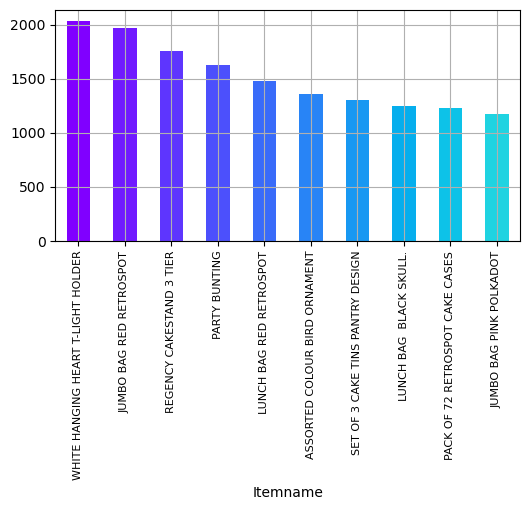

In [19]:
color=plt.cm.rainbow(np.linspace(0,1,30))
df['Itemname'].value_counts().head(10).plot.bar(color=color,figsize=(6,3))
# plt.title('Frequency of Most popular items',fontsize=14)
plt.xticks(rotation=90,fontsize=8)
plt.grid()
plt.show()

<a id="section-three"></a>
## <b><span style='color:#f0bc22'> 3. |</span> Market Basket Analysis

Since the UK is the most purchased country, let insight into the item combination purchased in the UK.

### <b><span style='color:#f0bc22'> 3-1. |</span> Implementing Apriori

In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [21]:
df['Itemname']=df['Itemname'].str.strip()
df['BillNo']=df['BillNo'].astype('str')

In [22]:
basket=(df[df['Country']=='United Kingdom']
        .groupby(['BillNo','Itemname'])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('BillNo'))

In [23]:
basket.head(3)

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
BillNo,,,,,,,,,,,,,,,,,,,,,
539993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [25]:
basket_sets=basket.applymap(encode_units)

In [26]:
frequent_itemsets=apriori(basket_sets,min_support=0.03,use_colnames=True)

/Users/serendipity1029/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [27]:
rules=round(association_rules(frequent_itemsets,metric='lift',min_threshold=1),2)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.05,0.05,0.03,0.59,12.41,0.03,2.32
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.05,0.05,0.03,0.64,12.41,0.03,2.64
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.05,0.05,0.03,0.60,13.23,0.03,2.40
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.05,0.05,0.03,0.72,13.23,0.03,3.39
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.05,0.04,0.03,0.66,15.50,0.03,2.80


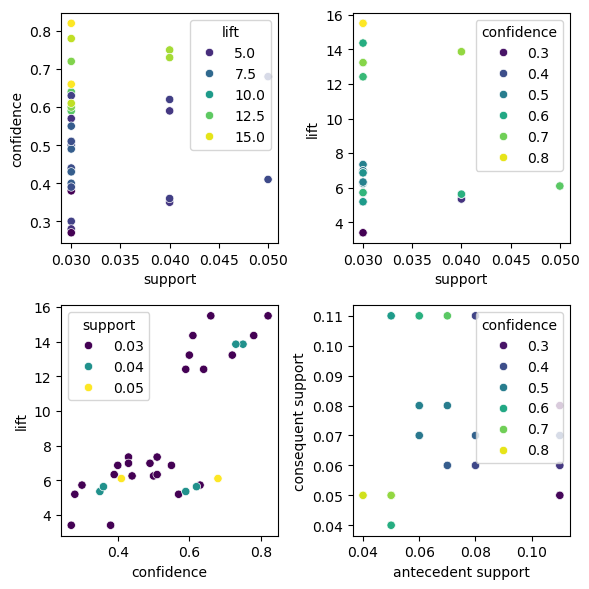

In [28]:
plt.figure(figsize=(6,6))
plt.subplot(221)
sns.scatterplot(x="support",y="confidence",data=rules,hue="lift",palette="viridis")
plt.subplot(222)
sns.scatterplot(x="support",y="lift",data=rules,hue="confidence",palette="viridis")
plt.subplot(223)
sns.scatterplot(x="confidence",y="lift",data=rules,hue='support',palette="viridis")
plt.subplot(224)
sns.scatterplot(x="antecedent support",y="consequent support",data=rules,hue='confidence',palette="viridis")
plt.tight_layout()
plt.show()

### <b><span style='color:#f0bc22'> 3-2. |</span> The top 5 of the highest **`support`** value of items(antecedents)

> #### *Support(item) = Transactions comprising the item / Total transactions*

In [29]:
rules[['antecedents','consequents','support']].sort_values('support',ascending=False)[:5]

,antecedents,consequents,support
13,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.05
12,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.05
16,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.04
17,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.04
15,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.04


In the top support value of purchase, it means that "JUMBO BAG PINK RETROSPOT" is present in 5% of all purchases.

### <b><span style='color:#f0bc22'> 3-3. |</span> The top 5 of the highest **`confidence`** value of items

> #### *Confidence = Transactions comprising antecedent and consequent / Transactions comprising antecedent*

In [30]:
rules[['antecedents','consequents','confidence']].sort_values('confidence',ascending=False)[:5]

,antecedents,consequents,confidence
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.82
30,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.78
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.75
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.73
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.72


In the top confidence value of the purchase, it means that 82% of the customers who bought "PINK REGENCY TEACUP AND SAUCER" also bought "GREEN REGENCY TEACUP AND SAUCER".

### <b><span style='color:#f0bc22'> 3-4. |</span> The top 5 of the highest **`lift`** value of items

> #### *Lift = Confidence (antecedent -> consequent) / Support(antecedent)*

In [31]:
rules[['antecedents','consequents','lift']].sort_values('lift',ascending=False)[:5]

,antecedents,consequents,lift
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),15.50
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),15.50
31,(ROSES REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),14.36
30,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),14.36
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),13.86


In the top list value of the purchase, it means that customers are 15.5 times more likely to buy "GREEN REGENCY TEACUP AND SAUCER" if you sell "PINK REGENCY TEACUP AND SAUCER".

### <b><span style='color:#f0bc22'> 3-5. |</span> The best combination of the items

In [32]:
rules[(rules['lift']>=13)&(rules['confidence']>=0.7)].sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.82,15.50,0.03,5.25
30,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.04,0.05,0.03,0.78,14.36,0.03,4.24
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.05,0.05,0.04,0.75,13.86,0.04,3.78
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.05,0.05,0.04,0.73,13.86,0.04,3.55
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.05,0.05,0.03,0.72,13.23,0.03,3.39


As you can see above, "REGENCY TEACUP AND SAUCER" have the best combination of the same items with different colors.

<a id="section-four"></a>
## <b><span style='color:#f0bc22'> 4. |</span> Conclusion

Here's what we learned from this analysis:
- The most purchased item is **`PAPER CRAFT, LITTLE BIRDIE`**.
- The most frequently purchased item is **`WHITE HANGING HEART T-LIGHT HOLDER`**.
- The best combination items are **`PINK REGENCY TEACUP AND SAUCER`** and **`GREEN REGENCY TEACUP AND SAUCER`**.

Hence, if you want to let customers purchase more, you can put an advertisement in `REGENCY TEACUP AND SAUCER` or put those items on the top of the page.

In [33]:
# Convert dataframe into transaction data
transaction_data = df.groupby(['BillNo', 'Date'])['Itemname'].apply(lambda x: ', '.join(x)).reset_index()

#Drop Unnecessary Columns
columns_to_drop = ['BillNo', 'Date']
transaction_data.drop(columns=columns_to_drop, inplace=True)

# Save the transaction data to a CSV file
transaction_data_path = 'transaction_data.csv'
transaction_data.to_csv(transaction_data_path, index=False)

In [34]:
# Display the first few rows of the transaction data
print("\nTransaction Data for Association Rule Mining:")
print(transaction_data.head())
transaction_data.shape


Transaction Data for Association Rule Mining:
                                            Itemname
0  JUMBO BAG PINK POLKADOT, BLUE POLKADOT WRAP, R...
1  RED HANGING HEART T-LIGHT HOLDER, CERAMIC BOWL...
2  GARDEN METAL SIGN, RED KITCHEN SCALES, VICTORI...
3  HANGING HEART ZINC T-LIGHT HOLDER, BREAD BIN D...
4                    ANTIQUE SILVER TEA GLASS ETCHED


(17908, 1)

In [35]:
# Split the 'Itemname' column into individual items
items_df = transaction_data['Itemname'].str.split(', ', expand=True)

# Concatenate the original DataFrame with the new items DataFrame
transaction_data = pd.concat([transaction_data, items_df], axis=1)

# Drop the original 'Itemname' column
transaction_data = transaction_data.drop('Itemname', axis=1)

# Display the resulting DataFrame
print(transaction_data.head())

                                0                                    1     \
0            JUMBO BAG PINK POLKADOT                   BLUE POLKADOT WRAP   
1   RED HANGING HEART T-LIGHT HOLDER  CERAMIC BOWL WITH LOVE HEART DESIGN   
2                  GARDEN METAL SIGN                   RED KITCHEN SCALES   
3  HANGING HEART ZINC T-LIGHT HOLDER            BREAD BIN DINER STYLE RED   
4    ANTIQUE SILVER TEA GLASS ETCHED                                 None   

                              2                           3     \
0               RED RETROSPOT WRAP     RECYCLING BAG RETROSPOT   
1  LARGE CAKE STAND HANGING HEARTS   PLACE SETTING WHITE HEART   
2       VICTORIAN SEWING BOX SMALL          VINTAGE SNAP CARDS   
3             IVORY KITCHEN SCALES  TRIPLE PHOTO FRAME CORNICE   
4                             None                        None   

                        4                            5     \
0  RED RETROSPOT SHOPPER BAG      JUMBO BAG RED RETROSPOT   
1   DOORSTOP RETRO

In [36]:
# Convert items to boolean columns
df_encoded = pd.get_dummies(transaction_data, prefix='', prefix_sep='').groupby(level=0, axis=1).max()

# Save the transaction data to a CSV file
df_encoded.to_csv('transaction_data_encoded.csv', index=False)

Association Rule Mining
We apply the Apriori algorithm to perform association rule mining on the encoded transaction data. The min_support parameter is set to 0.007 to filter out infrequent itemsets. The resulting frequent itemsets are then used to generate association rules based on a minimum confidence threshold of 0.5.Finally, we print the generated association rules.

In [37]:
# Load transaction data into a DataFrame
df_encoded = pd.read_csv('transaction_data_encoded.csv')

from mlxtend.frequent_patterns import apriori, association_rules

# Association Rule Mining
frequent_itemsets = apriori(df_encoded, min_support=0.007, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display information of the rules
print("Association Rules:")
print(rules.head())

Association Rules:
                         antecedents                        consequents  \
0       (6 GIFT TAGS 50'S CHRISTMAS)    (6 GIFT TAGS VINTAGE CHRISTMAS)   
1    (6 GIFT TAGS VINTAGE CHRISTMAS)       (6 GIFT TAGS 50'S CHRISTMAS)   
2       (6 GIFT TAGS 50'S CHRISTMAS)         (ROLL WRAP 50'S CHRISTMAS)   
3            (CHOCOLATE BOX RIBBONS)           (6 RIBBONS RUSTIC CHARM)   
4  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.017646            0.017981  0.009102    0.515823  28.687436   
1            0.017981            0.017646  0.009102    0.506211  28.687436   
2            0.017646            0.019544  0.009325    0.528481  27.040108   
3            0.016026            0.048470  0.008320    0.519164  10.711042   
4            0.021555            0.066004  0.012062    0.559585   8.478052   

   leverage  conviction  
0  0.008785    2.028223  
1  0.0087

Visualizing Market Basket Analysis Results
We use matplotlib and seaborn libraries to create a scatterplot visualizing the results of the market basket analysis. The plot depicts the relationship between support, confidence, and lift for the generated association rules.

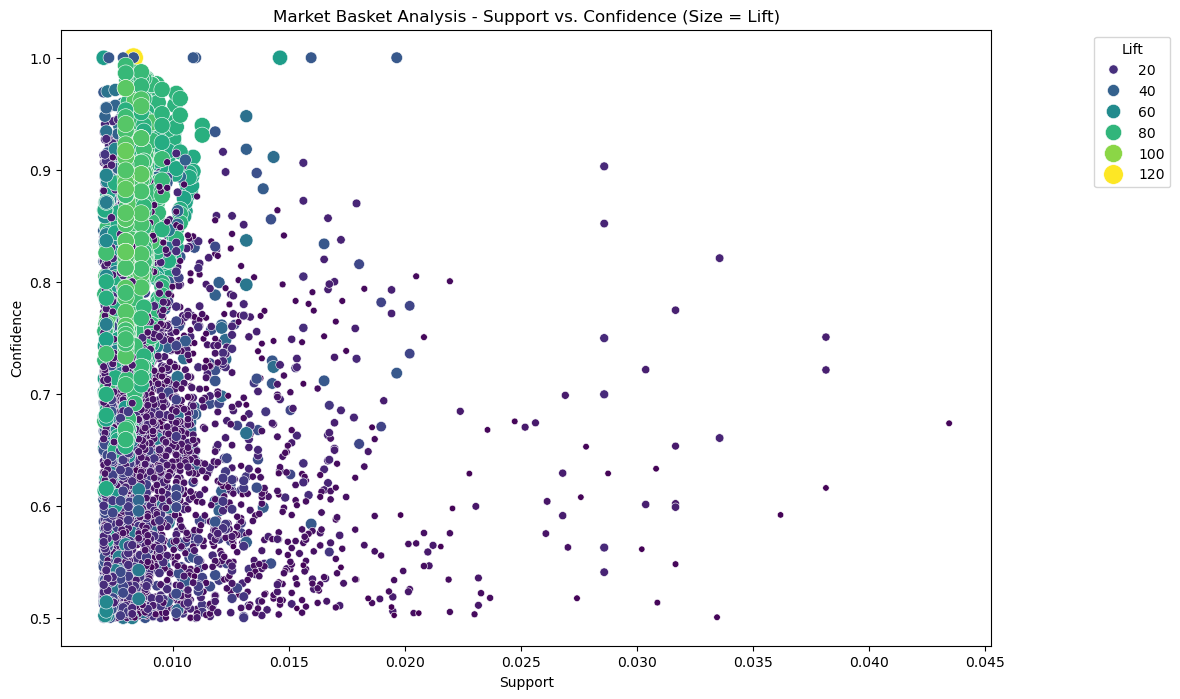

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# Plot scatterplot for Support vs. Confidence
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Market Basket Analysis - Support vs. Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Interactive Market Basket Analysis Visualization
We leverage the Plotly Express library to create an interactive scatter plot visualizing the results of the market basket analysis. This plot provides an interactive exploration of the relationship between support, confidence, and lift for the generated association rules.

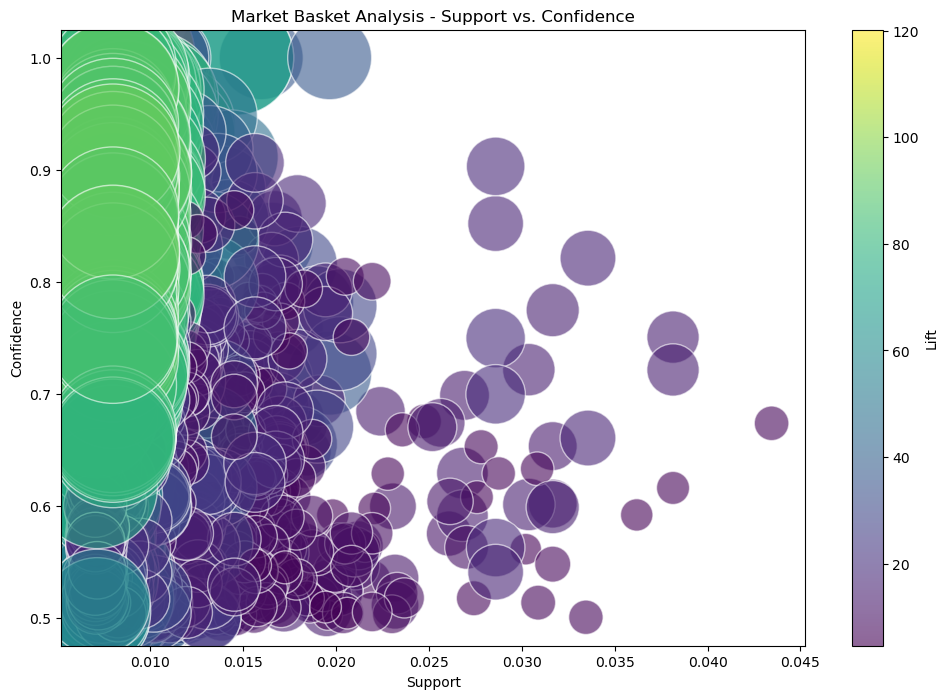

In [39]:
# Convert frozensets to lists for serialization
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# 假设 rules DataFrame 已正确设置
# rules['antecedents'] = rules['antecedents'].apply(list)
# rules['consequents'] = rules['consequents'].apply(list)

# 创建图表
plt.figure(figsize=(12, 8))

# 根据 'lift' 值映射颜色和大小
# 创建颜色映射器
cmap = plt.cm.viridis
norm = mcolors.Normalize(vmin=rules['lift'].min(), vmax=rules['lift'].max())

# 绘制散点图
sc = plt.scatter(rules['support'], rules['confidence'], 
                 c=rules['lift'], s=rules['lift']*100, # 根据 lift 调整大小
                 cmap=cmap, norm=norm, alpha=0.6, edgecolors='w')

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('Lift')

# 设置标题和坐标轴标签
plt.title('Market Basket Analysis - Support vs. Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')

# 显示图表
plt.show()


Interactive Network Visualization for Association Rules
We utilize the NetworkX and Plotly libraries to create an interactive network graph visualizing the association rules. This graph represents relationships between antecedent and consequent items, showcasing support as edge weights.

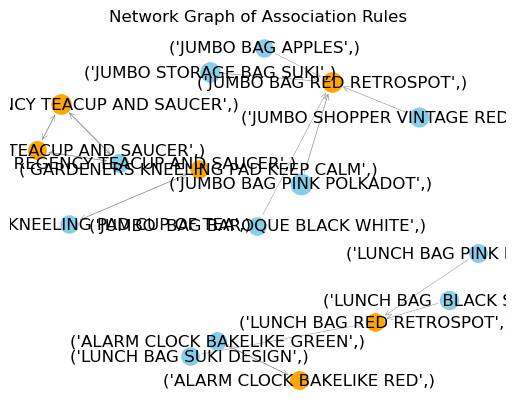

In [56]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建有向图
G = nx.DiGraph()

# 添加节点和边，这里只添加支持度大于某个阈值的规则
threshold = 0.03  # 可以根据你的数据调整这个阈值
for idx, row in rules.iterrows():
    if row['support'] >= threshold:
        G.add_node(tuple(row['antecedents']), color='skyblue', size=row['support'])
        G.add_node(tuple(row['consequents']), color='orange', size=row['support'])
        G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['support'])

# 使用不同的布局
pos = nx.spring_layout(G, k=0.15, iterations=20)  # 调整 k 值和迭代次数以改善布局

# 绘制节点，调整大小以避免重叠
for node, attributes in G.nodes(data=True):
    nx.draw_networkx_nodes(G, pos, [node], 
                           node_color=attributes['color'], 
                           node_size=attributes['size'] * 5000)  # 调整大小

# 绘制边，调整宽度以避免重叠
for edge in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, [edge], 
                           arrowstyle="->", 
                           arrowsize=10, 
                           edge_color='gray', 
                           width=edge[2]['weight'] * 10)  # 调整宽度

# 添加标签
nx.draw_networkx_labels(G, pos)

# 显示图表
plt.title('Network Graph of Association Rules')
plt.axis('off')
plt.show()


Interactive Sunburst Chart for Association Rules
We use Plotly Express to create an interactive sunburst chart visualizing association rules. This chart represents the relationships between antecedent and consequent items, showcasing lift as well as support through color intensity.

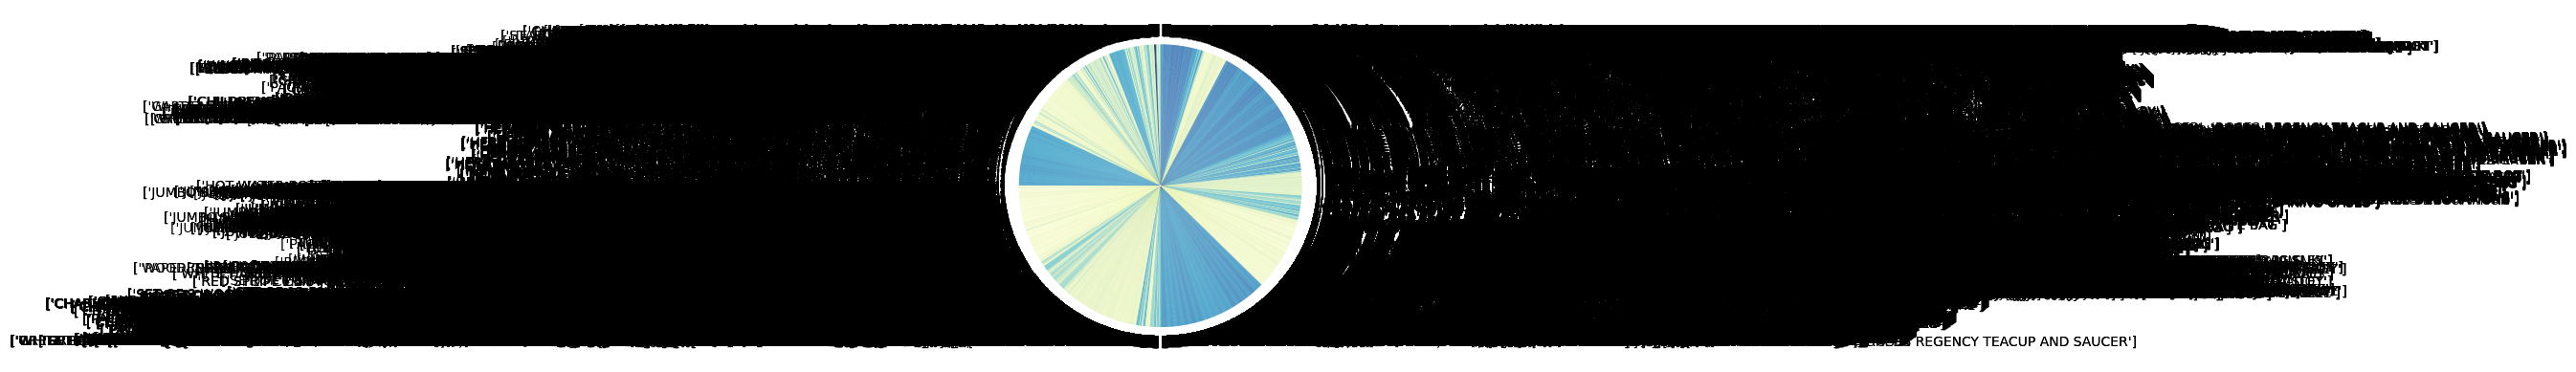

In [60]:
import plotly.express as px

# Combine antecedents and consequents into a single column for each rule
rules['rule'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)

import matplotlib.pyplot as plt
import matplotlib as mpl
import mplcursors
import numpy as np

# 假设 rules DataFrame 已正确设置
# rules['rule'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)

def plot_sunburst(data, column, value):
    labels = data[column].values
    sizes = data[value].values

    # Normalize the values to fit the circle
    norm = mpl.colors.Normalize(vmin=sizes.min(), vmax=sizes.max())
    cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.YlGnBu)

    # Create figure and axis
    fig, ax = plt.subplots()
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    # Create the sunburst chart
    wedges, texts = ax.pie(sizes, labels=labels, startangle=90, colors=[cmap.to_rgba(x) for x in sizes])

    # Interactive cursor
    mplcursors.cursor(hover=True)

    # Show the plot
    plt.show()

plot_sunburst(rules, 'rule', 'lift')
